# Proyek Klasifikasi Gambar: intel-image-classification


*   Nama: Hanfiy Zamaksyary Qurthuby
*   Email: hanfiyzamaksyary@gmail.com
* ID Dicoding: hanfiyzq


# Import Semua Packages/Library yang Digunakan

In [1]:
!pip install -q tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 1.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [85]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers, models
import tensorflowjs as tfjs
from PIL import Image

import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Preparation

## Data loading

In [3]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"hanfiyz","key":"999471a404fba6eb301aa880758136d4"}'}

In [4]:
!mkdir -p ~/.kaggle
!mv "kaggle (1).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d puneet6060/intel-image-classification
!unzip -n intel-image-classification.zip -d intel_dataset

Streaming output truncated to the last 5000 lines.
  inflating: intel_dataset/seg_train/seg_train/mountain/7506.jpg  
  inflating: intel_dataset/seg_train/seg_train/mountain/7537.jpg  
  inflating: intel_dataset/seg_train/seg_train/mountain/7539.jpg  
  inflating: intel_dataset/seg_train/seg_train/mountain/7551.jpg  
  inflating: intel_dataset/seg_train/seg_train/mountain/7560.jpg  
  inflating: intel_dataset/seg_train/seg_train/mountain/7565.jpg  
  inflating: intel_dataset/seg_train/seg_train/mountain/7578.jpg  
  inflating: intel_dataset/seg_train/seg_train/mountain/7581.jpg  
  inflating: intel_dataset/seg_train/seg_train/mountain/7586.jpg  
  inflating: intel_dataset/seg_train/seg_train/mountain/7647.jpg  
  inflating: intel_dataset/seg_train/seg_train/mountain/7652.jpg  
  inflating: intel_dataset/seg_train/seg_train/mountain/7654.jpg  
  inflating: intel_dataset/seg_train/seg_train/mountain/7662.jpg  
  inflating: intel_dataset/seg_train/seg_train/mountain/767.jpg  
  inflating:

## Data Preprocessing & Split

In [99]:
train_dir = '/content/intel_dataset/seg_train/seg_train'
test_dir = '/content/intel_dataset/seg_test/seg_test'

# Load training data with 80% train dan 20% validation
batch_size = 32
img_size = (150, 150)

# Train dan Validation
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    subset='training',
    image_size=img_size,
    batch_size=batch_size,
    seed=123,
    validation_split=0.2
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    subset='validation',
    image_size=img_size,
    batch_size=batch_size,
    seed=123,
    validation_split=0.2
)

# Load test data
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False,
)

class_names = train_ds.class_names
print('classes:', class_names)

Found 14034 files belonging to 6 classes.
Using 11228 files for training.
Found 14034 files belonging to 6 classes.
Using 2806 files for validation.
Found 3000 files belonging to 6 classes.
classes: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


# Modelling

In [100]:
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(150, 150, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_18 (Rescaling)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_56 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_57 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_58 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 15, 15, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_59 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 424,006 (1.62 MB)

 Trainable params: 423,046 (1.61 MB)

 Non-trainable params: 960 (3.75 KB)

## Callbacks

In [101]:
# callbacks
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_ckpt = tf.keras.callbacks.ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)
lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(patience=5, factor=0.5, verbose=1)

## Train model

In [102]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[early_stop, model_ckpt, lr_reducer]
)

Epoch 1/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.5309 - loss: 1.2835 - val_accuracy: 0.3361 - val_loss: 2.1301 - learning_rate: 0.0010
Epoch 2/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.7205 - loss: 0.7556 - val_accuracy: 0.4116 - val_loss: 3.2547 - learning_rate: 0.0010
Epoch 3/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.7739 - loss: 0.6167 - val_accuracy: 0.7965 - val_loss: 0.5791 - learning_rate: 0.0010
Epoch 4/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.7959 - loss: 0.5589 - val_accuracy: 0.6882 - val_loss: 0.8071 - learning_rate: 0.0010
Epoch 5/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.8150 - loss: 0.4832 - val_accuracy: 0.8297 - val_loss: 0.4673 - learning_rate: 0.0010
Epoch 6/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.8349 - loss: 0.4770 - val_accuracy: 0.7894 - val_loss: 0.5759 - learning_rate: 0.0010
Epoch 7/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.8442 - l

## Evaluasi dan Visualisasi

In [82]:
# testing accuracy
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc*100:.4f}%, Test Loss: {test_loss:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8447 - loss: 0.4410
Test Accuracy: 85.2667%, Test Loss: 0.4228


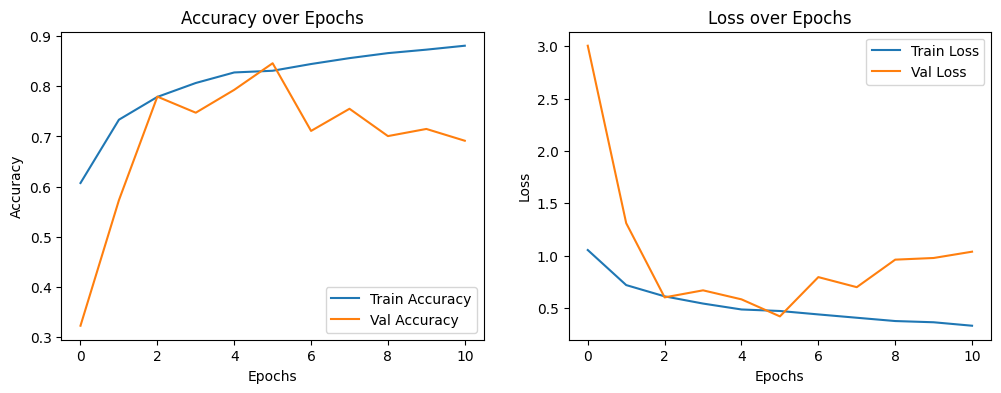

In [83]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Konversi Model

In [84]:
os.makedirs('/content/saved_model', exist_ok=True)
os.makedirs('/content/tflite', exist_ok=True)
os.makedirs('/content/tfjs_model', exist_ok=True)

# saved model
model.export('/content/saved_model')

# TF-Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('/content/tflite/model.tflite', 'wb') as f:
    f.write(tflite_model)

# label txt for tflite
class_names = train_ds.class_names
with open('/content/tflite/labels.txt', 'w') as f:
    f.write('\n'.join(class_names))

# tfjs
tfjs.converters.save_keras_model(model, '/content/tfjs_model')

#compress file content
zip_path = '/content/models.zip'
!zip -r {zip_path} /content/saved_model /content/tflite /content/tfjs_model

# download file
files.download(zip_path)

Saved artifact at '/content/saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor_182')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  135774770551440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135774770550288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135772716501136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135776804493008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135776804491472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135774770550864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135776804490704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135772716500752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135772359212496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135772359212112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135772

failed to lookup keras version from the file,
    this is likely a weight only file
  adding: content/saved_model/ (stored 0%)
  adding: content/saved_model/saved_model.pb (deflated 88%)
  adding: content/saved_model/assets/ (stored 0%)
  adding: content/saved_model/fingerprint.pb (stored 0%)
  adding: content/saved_model/variables/ (stored 0%)
  adding: content/saved_model/variables/variables.index (deflated 71%)
  adding: content/saved_model/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/tflite/ (stored 0%)
  adding: content/tflite/labels.txt (deflated 2%)
  adding: content/tflite/model.tflite (deflated 8%)
  adding: content/tfjs_model/ (stored 0%)
  adding: content/tfjs_model/group1-shard1of1.bin (deflated 7%)
  adding: content/tfjs_model/model.json (deflated 90%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Inference (Optional)

Predicted class: forest


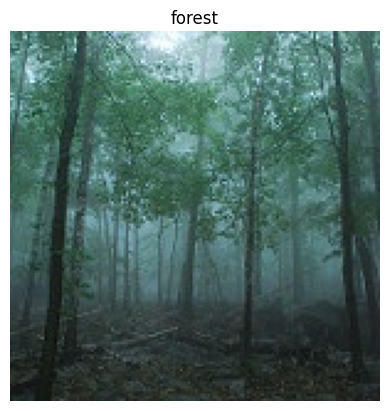

In [105]:
interpreter = tf.lite.Interpreter(model_path='/content/tflite/model.tflite')
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

def preprocess_image(image_path):
    img = Image.open(image_path).resize((150, 150))
    img_array = np.array(img).astype(np.float32) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array, img

# Preprocess the image
input_array, img  = preprocess_image('/content/intel_dataset/seg_test/seg_test/forest/20100.jpg')

# Set input tensor
interpreter.set_tensor(input_details[0]['index'], input_array)

# Run inference
interpreter.invoke()

# Get prediction
output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_index = np.argmax(output_data[0])
confidence = np.max(output_data[0])

# Show result
print(f"Predicted class: {class_names[predicted_index]}")

plt.imshow(img)
plt.axis('off')
plt.title(f"{class_names[predicted_index]}")
plt.show()